# Machine Learning Basics with Scikit-learn: Day 2

Today we will learn about **supervised learning.** We will cover some popular methods implemented in *scikit-learn*. If you are interested in learning more, explore the [Supervised Learning documentation](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). 

Supervised learning consists in learning the relationship between two datasets: the observed data `X` and an external variable `y` that we are trying to predict, usually called “target” or “labels”. Most often, `y` is a one-dimension array of length `n_samples`.

To run these models easily, all supervised estimators in *scikit-learn* implement a `fit(X, y)` function to fit the model and a `predict(X)` function to predicte labels `y` given observations `X`.

### Distinction between classification and regression
Supervised learning aims to predict an outcome `y` based on information available `X`. There are two kinds of strategies: 
* If the prediction task is to classify the observations in a set of *categorical* values, in other words to “name” the objects observed, the task is said to be a **classification** task. Given the input `X` and the real values `y`, the model predicts the outcomes `y',` which can be correct or wrong. The `y` is a vector of integers (i.e., 0 or 1) or strings (e.g., `class1`,`class2`).
* On the other hand, if the goal is to predict a *continuous* target variable, it is said to be a **regression** task. Based on the input `X`, we will obtain a numerical value `y'`, which is an approximation of the real value `y.`

We will focus on classification models:
* Nearest neighbors
* Decision trees
* Logistic regressions
* Neural networks
* Support vector machines

We will start loading all the packages required to run these models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn import neighbors, datasets
from sklearn import svm
from sklearn import tree

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.tree import export_text

### Importing the dataset
We will use the Wine dataset provided by `scikit-learn.` The data are the results of a chemical analysis of wines grown in the same region in Italy by *three* different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine:
* Alcohol
* Malic acid
* Ash
* Alcalinity of ash
* Magnesium
* Total phenols
* Flavanoids
* Nonflavanoid phenols
* Proanthocyanins
* Color intensity
* Hue
* OD280/OD315 of diluted wines
* Proline

In [2]:
wine_dataset = datasets.load_wine()
wine = pd.DataFrame(wine_dataset.data, columns=wine_dataset.feature_names)
wine['target'] = pd.Series(wine_dataset.target)

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [82]:
wine.target.unique()

array([0, 1, 2])

In [83]:
wine.shape

(178, 14)

In [84]:
wine.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


For demo purposes, we will use two dimensions of the dataset. In your exercises, you will create the models using **all** the features. 

In [6]:
X = wine.iloc[:,:2]
y = wine.target

In [7]:
X

,alcohol,malic_acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59
...,...,...
173,13.71,5.65
174,13.40,3.91
175,13.27,4.28
176,13.17,2.59


### Datasets for your exercises
As yesterday, we partition the dataset into training and testing datasets. We will use the 80/20 proportion.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [9]:
X_train

,alcohol,malic_acid
157,12.45,3.03
144,12.25,3.88
7,14.06,2.15
17,13.83,1.57
50,13.05,1.73
...,...,...
69,12.21,1.19
112,11.76,2.68
49,13.94,1.73
110,11.46,3.74


We will do the same using all the features.

In [10]:
X_all = wine.iloc[:,:-1]
y_all = wine.target
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, test_size = 0.2)

In [11]:
X_all_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
138,13.49,3.59,2.19,19.5,88.0,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0
30,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0
89,12.08,1.33,2.30,23.6,70.0,2.20,1.59,0.42,1.38,1.74,1.07,3.21,625.0
131,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530.0
34,13.51,1.80,2.65,19.0,110.0,2.35,2.53,0.29,1.54,4.20,1.10,2.87,1095.0


## 1. KNN (k nearest neighbors) classifier
The simplest possible classifier is the *nearest neighbor*: given a new observation `X_test`, find in the training set the observation with the closest feature vector. The model considers *k* nearest neighbors to make a prediction.

![Example of kkn](https://www.kdnuggets.com/wp-content/uploads/popular-knn-metrics-0.png)

This happens for each and every test observation and that is how it finds similarities in the data. For calculating distances KNN uses a distance metric from the list of available metrics.

Please see the [Nearest Neighbors section](https://scikit-learn.org/stable/modules/neighbors.html#neighbors) of the online Scikit-learn documentation for more information about this type of classifier.

Let's start creating the knn model:

In [12]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

Now, we use this model to predict the values of the wine' class (`y_predict`) using the testing set (`X_test`).

In [13]:
y_predicted = knn.predict(X_test)
y_predicted

array([0, 2, 2, 1, 0, 1, 1, 1, 0, 0, 0, 2, 0, 2, 2, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 0, 0])

Let's compare how good are the predicted values with respect to the real values

In [14]:
np.array(y_test)

array([0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 2, 1, 2, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 1, 1, 0, 1, 2, 1, 2, 0, 1, 0, 2, 0])

We will consolidate all the results in one single table and check if the predictions are correct.

In [15]:
results = pd.DataFrame({'y_real':y_test, 'y_predicted':y_predicted})
results["is_correct"] = [i['y_real'] == i['y_predicted'] for k,i in results.iterrows()]
results.head()

,y_real,y_predicted,is_correct
15,0,0,True
169,2,2,True
174,2,2,True
84,1,1,True
32,0,0,True


Let's count how many are correct and how many are false

In [16]:
print("Correct predictions: " + str(len(results[results.is_correct == True])))
print("Wrong predictions: " + str(len(results[results.is_correct == False])))
print("Percentage of correct predictions: " + str(round(100*len(results[results.is_correct == True])/len(results),2)) + "%")

Correct predictions: 27
Wrong predictions: 9
Percentage of correct predictions: 75.0%


Since we are using two dimensions, we can see visually how the model predicts.  

/Users/v.henry/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


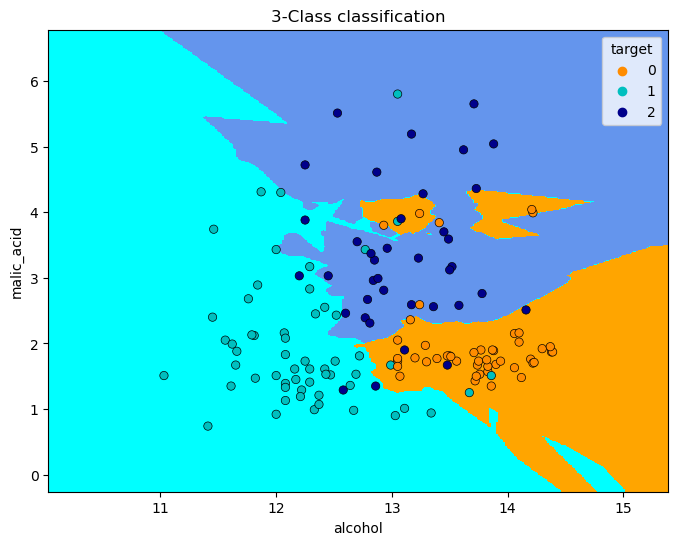

In [17]:
# Create color maps
h = .02  # step size in the mesh
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the areas according to the model
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(x=X_train.iloc[:, 0], y=X_train.iloc[:, 1], hue=y_train,
                palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification")

plt.show()

### Exercise 1:
Now, it's your turn to create the model with all the features: `X_all_train`, `y_all_train` 

In [18]:
# Run a new model. Remember to use X_all_train and y_all_train
# knn = ...

In [19]:
# Get the predicted value. Remember to use `X_all_test`
# y_all_predicted = ...

In [20]:
# Create the new result dataframe
# results = pd.DataFrame({'y_real': y_all_test, 'y_predicted': y_all_predicted})
# results["is_correct"] = [i['y_real'] == i['y_predicted'] for k,i in results.iterrows()]
# results

In [21]:
# Run the new results
# print("Correct predictions: " + str(len(results[results.is_correct == True])))
# print("Wrong predictions: " + str(len(results[results.is_correct == False])))
# print("Percentage of correct predictions: " + str(round(100*len(results[results.is_correct == True])/len(results),2)) + "%")

Which model is doing better? The one using two variables or all the variables?

## 2. Decision Trees
Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

Decision trees learn from data and set *if-then-else* decision rules. The deeper the tree, the more complex the decision rules and the fitter the model.

Here is a simple example:

<img src="https://miro.medium.com/max/2000/1*jojTznh4HOX_8cGw_04ODA.png" alt="drawing" width="700"/>

Some advantages of decision trees are:
* Simple to understand and to interpret. Trees can be visualised.
* Requires little data preparation. 
* Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.
* Able to handle multi-output problems.
* Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.
* Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.
* Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

The disadvantages of decision trees include:
* Decision-tree learners can create over-complex trees that do not generalise the data well. This is called *overfitting*.
* Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. 
* There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.
* Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

For more information, check the [documentation](https://scikit-learn.org/stable/modules/tree.html).


### Creating a decision-tree
Let's create a decision tree classifier:

In [64]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [65]:
y_predicted = clf.predict(X_test)
results = pd.DataFrame({'y_real': y_test, 'y_predicted': y_predicted})
results["is_correct"] = [i['y_real'] == i['y_predicted'] for k,i in results.iterrows()]

print("Correct predictions: " + str(len(results[results.is_correct == True])))
print("Wrong predictions: " + str(len(results[results.is_correct == False])))
print("Percentage of correct predictions: " + str(round(100*len(results[results.is_correct == True])/len(results),2)) + "%")

Correct predictions: 26
Wrong predictions: 10
Percentage of correct predictions: 72.22%


We got a high accurate model using a decision tree. We can visualize the rules created by the decision tree:

In [66]:
r = export_text(clf, feature_names=wine.columns[:2].tolist())
print(r)

|--- alcohol <= 12.78
|   |--- malic_acid <= 2.96
|   |   |--- alcohol <= 12.55
|   |   |   |--- class: 1
|   |   |--- alcohol >  12.55
|   |   |   |--- malic_acid <= 2.10
|   |   |   |   |--- alcohol <= 12.61
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- alcohol >  12.61
|   |   |   |   |   |--- class: 1
|   |   |   |--- malic_acid >  2.10
|   |   |   |   |--- class: 2
|   |--- malic_acid >  2.96
|   |   |--- alcohol <= 12.12
|   |   |   |--- class: 1
|   |   |--- alcohol >  12.12
|   |   |   |--- alcohol <= 12.74
|   |   |   |   |--- malic_acid <= 3.36
|   |   |   |   |   |--- malic_acid <= 3.10
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- malic_acid >  3.10
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- malic_acid >  3.36
|   |   |   |   |   |--- class: 2
|   |   |   |--- alcohol >  12.74
|   |   |   |   |--- class: 1
|--- alcohol >  12.78
|   |--- malic_acid <= 2.24
|   |   |--- malic_acid <= 1.30
|   |   |   |--- class: 1
|   |   |--- malic_a

We can visualize the model as a decision tree. 

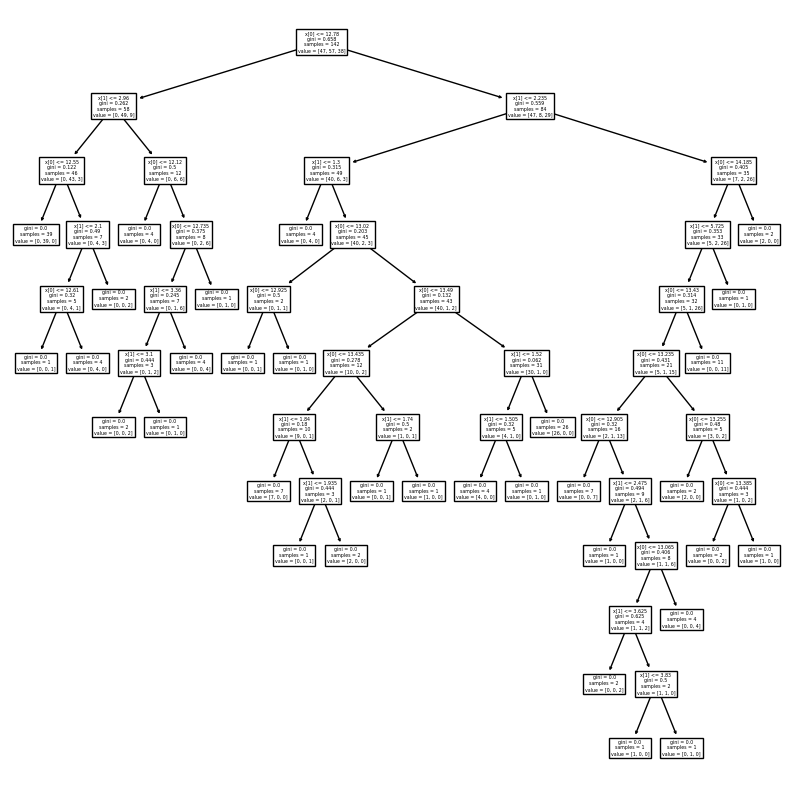

In [70]:
plt.figure(1, figsize=(10, 10))
tree.plot_tree(clf)
plt.show()

And also, we can see these regions in a 2D plane.

/Users/v.henry/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


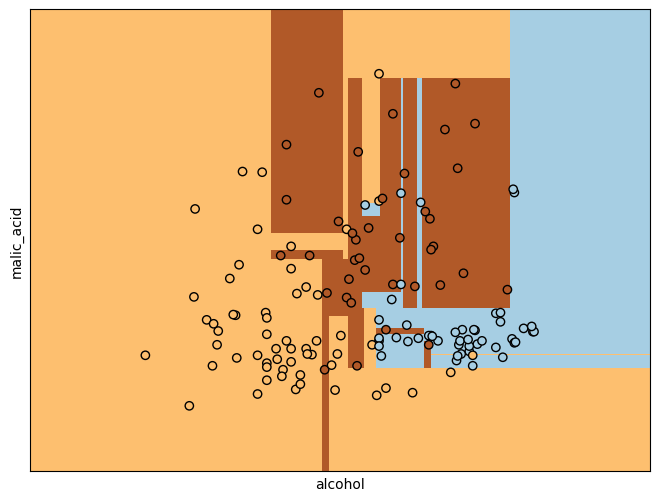

In [68]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, shading='auto', cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(wine.columns[0])
plt.ylabel(wine.columns[1])

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Exercise 2:
Now, it's your turn to create a decision tree using all the features available. How well does this model perfom? Is it better or worse?

In [71]:
# Create your model here with X_all_train and y_all_train. Don't forget to run the fit function:
# clf = ...

In [72]:
# Get the predicted value. Don't forget to use `X_all_test`
# y_all_predicted = ...

In [73]:
# Create the new result dataframe
#results = pd.DataFrame({'y_real': y_all_test, 'y_predicted': y_all_predicted})
#results["is_correct"] = [i['y_real'] == i['y_predicted'] for k,i in results.iterrows()]
#results

In [74]:
# Run the new results
#print("Correct predictions: " + str(len(results[results.is_correct == True])))
#print("Wrong predictions: " + str(len(results[results.is_correct == False])))
#print("Percentage of correct predictions: " + str(round(100*len(results[results.is_correct == True])/len(results),2)) + "%")

## 3. Logistic regressions

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. The logistic regression (or logit regression) estimates the parameters of a *logistic model* (a form of binary regression). 

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_logistic_001.png" alt="drawing" width="400"/>

Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1".

We will create a logistic regression with the current data.

In [75]:
log = LogisticRegression(C=1e5)
log.fit(X_train, y_train)

LogisticRegression(C=100000.0)

In [76]:
y_predicted = log.predict(X_test)
results = pd.DataFrame({'y_real':y_test, 'y_predicted':y_predicted})
results["is_correct"] = [i['y_real'] == i['y_predicted'] for k,i in results.iterrows()]
results.head()

,y_real,y_predicted,is_correct
15,0,0,True
169,2,2,True
174,2,2,True
84,1,1,True
32,0,0,True


In [77]:
print("Correct predictions: " + str(len(results[results.is_correct == True])))
print("Wrong predictions: " + str(len(results[results.is_correct == False])))
print("Percentage of correct predictions: " + str(round(100*len(results[results.is_correct == True])/len(results),2)) + "%")

Correct predictions: 28
Wrong predictions: 8
Percentage of correct predictions: 77.78%


We will plot the classification results:

/Users/v.henry/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


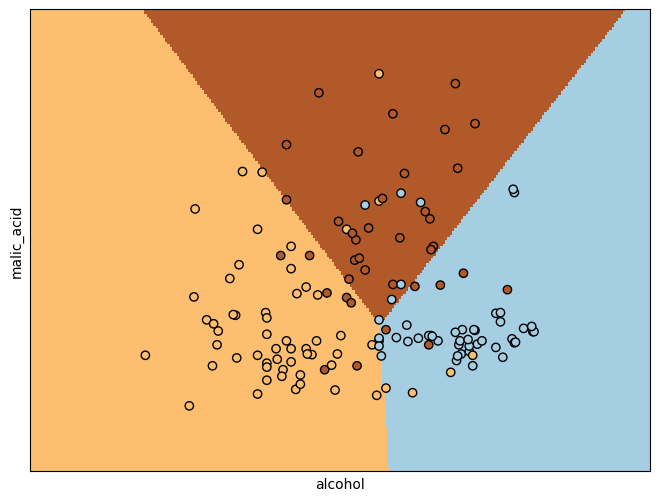

In [34]:
Z = log.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, shading='auto', cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(wine.columns[0])
plt.ylabel(wine.columns[1])

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Exercise 3:
Now, it's your turn to create a linear regression mdoel using all the features available. How well does this model perfom? Is it better or worse?

In [35]:
# Create your model here. Don't forget to run the fit function:
#log = ....

In [36]:
# Get the predicted value. Remember to use `X_all_test`
#y_all_predicted = ...

In [37]:
# Create the new result dataframe
#results = pd.DataFrame({'y_real': y_all_test, 'y_predicted': y_all_predicted})
#results["is_correct"] = [i['y_real'] == i['y_predicted'] for k,i in results.iterrows()]
#results

In [38]:
# Run the new results
#print("Correct predictions: " + str(len(results[results.is_correct == True])))
#print("Wrong predictions: " + str(len(results[results.is_correct == False])))
#print("Percentage of correct predictions: " + str(round(100*len(results[results.is_correct == True])/len(results),2)) + "%")

# 4. Support vector machines (SVMs)

Support Vector Machines belong to the discriminant model family. These models try to find a combination of samples to build a *threshold* maximizing the margin between two classes. After using the training examples to create this threshold, SVM maps new examples into that same space and predicts their category to belong based on which side of the gap they fall.

The main features of SVMs are:
* allowing to make a certain number of mistakes during the training process.
* keeping margin as wide as possible so that other points can still be classified correctly.

This process is known as *Soft Margin Formulation.*

<img src="https://miro.medium.com/max/1400/1*M_3iYollNTlz0PVn5udCBQ.png" alt="drawing" width="500"/>

This method is highly effective to solve classification problems in non-lineable separable spaces. SVMs performs a non-linear classification using what is called the **kernel trick**, implicitly mapping their inputs into high-dimensional feature spaces.

<img src="https://miro.medium.com/max/1400/1*mCwnu5kXot6buL7jeIafqQ.png" alt="drawing" width="600"/>

If you are interested in learning more, check out this [link](https://towardsdatascience.com/support-vector-machines-soft-margin-formulation-and-kernel-trick-4c9729dc8efe).


## Creating the threshold.
There are three main kernels used to identify these thresholds, which will separate the classes using SVM:
* Linear: A lineal formulation will be used to separate the classes
* Polinomial: A polinomial function (i.e., x^2, x^3, x^4, ...) will be used to separate the classes.
* Radial Basis Function (RBF): It uses normal curves around the data points, and sums these so that the decision boundary can be defined by a type of topology condition such as curves where the sum is above a value of 0.5. 

We will start running the **SVC lineal kernel** in the next line:

In [39]:
svc = svm.SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

Let's check the predicted values from the *testing* dataset

In [40]:
y_predicted = svc.predict(X_test)
y_predicted

array([0, 2, 2, 1, 0, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 1, 2, 1, 1, 2, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 2, 0, 2, 0, 2, 0])

We are going to consolidate the predicted results with the real results.

In [41]:
results = pd.DataFrame({'y_real':y_test, 'y_predicted':y_predicted})
results["is_correct"] = [i['y_real'] == i['y_predicted'] for k,i in results.iterrows()]
results.head()

,y_real,y_predicted,is_correct
15,0,0,True
169,2,2,True
174,2,2,True
84,1,1,True
32,0,0,True


Checking the results

In [42]:
print("Correct predictions: " + str(len(results[results.is_correct == True])))
print("Wrong predictions: " + str(len(results[results.is_correct == False])))
print("Percentage of correct predictions: " + str(round(100*len(results[results.is_correct == True])/len(results),2)) + "%")

Correct predictions: 29
Wrong predictions: 7
Percentage of correct predictions: 80.56%


Let's plot the classification model. 

/Users/v.henry/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


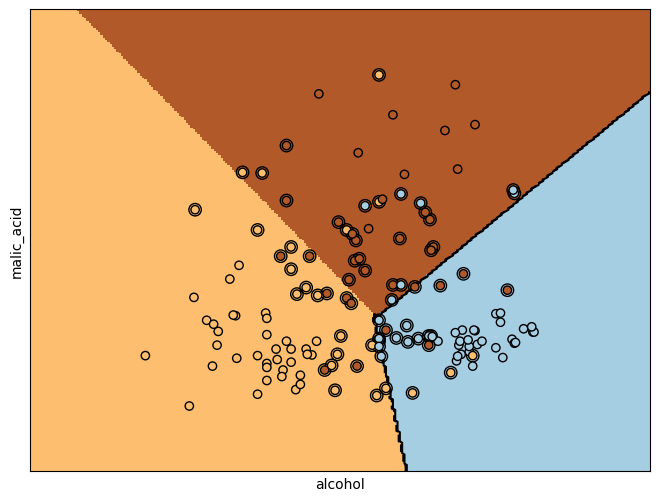

In [43]:
# plot the line, the points, and the nearest vectors to the plane
fignum = 1
plt.figure(fignum, figsize=(8, 6))
plt.clf()

plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10, edgecolors='k')
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, zorder=10, cmap=plt.cm.Paired,
            edgecolors='k')
plt.axis('tight')

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(fignum, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')
plt.contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])
plt.xlabel(wine.columns[0])
plt.ylabel(wine.columns[1])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())
fignum = fignum + 1

### Exercise 4:
Now, it's your turn to create a SVM model with a linear kernel using all the features available. How well does this model perfom? Is it better or worse?

In [44]:
# Create your model here. Don't forget to run the fit function:
#svc = ...

In [45]:
# Get the predicted value. Don't forget to use X_all_test
#y_all_predicted = ...

In [46]:
# Create the new result dataframe
#results = pd.DataFrame({'y_real': y_all_test, 'y_predicted': y_all_predicted})
#results["is_correct"] = [i['y_real'] == i['y_predicted'] for k,i in results.iterrows()]
#results

In [47]:
# Run the new results
#print("Correct predictions: " + str(len(results[results.is_correct == True])))
#print("Wrong predictions: " + str(len(results[results.is_correct == False])))
#print("Percentage of correct predictions: " + str(round(100*len(results[results.is_correct == True])/len(results),2)) + "%")

### Polynominal kernel
Now, we will use a polynomial kernel with degree 2. This will include a quadratic function in the formula. 

In [48]:
svc = svm.SVC(kernel='poly', gamma=2)
svc.fit(X_train, y_train)

SVC(gamma=2, kernel='poly')

Now, we calculate the predicted values from the testing dataset

In [49]:
y_predicted = svc.predict(X_test)
results = pd.DataFrame({'y_real':y_test, 'y_predicted':y_predicted})
results["is_correct"] = [i['y_real'] == i['y_predicted'] for k,i in results.iterrows()]

print("Correct predictions: " + str(len(results[results.is_correct == True])))
print("Wrong predictions: " + str(len(results[results.is_correct == False])))
print("Percentage of correct predictions: " + str(round(100*len(results[results.is_correct == True])/len(results),2)) + "%")

Correct predictions: 27
Wrong predictions: 9
Percentage of correct predictions: 75.0%


We will plot the plane to see the new thresholds 

/Users/v.henry/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


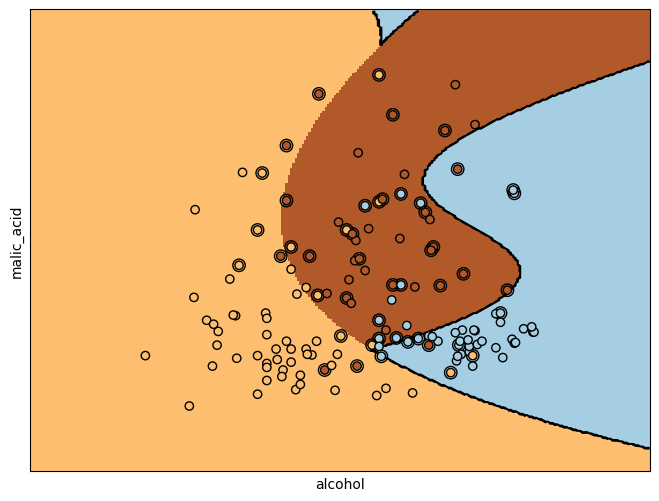

In [50]:
# plot the line, the points, and the nearest vectors to the plane
fignum = 1
plt.figure(fignum, figsize=(8, 6))
plt.clf()

plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10, edgecolors='k')
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, zorder=10, cmap=plt.cm.Paired,
            edgecolors='k')

plt.axis('tight')
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(fignum, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')
plt.contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])
plt.xlabel(wine.columns[0])
plt.ylabel(wine.columns[1])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())
fignum = fignum + 1

### RBF kernel
Lastly, let's use the Radial Basis Function kernel to detect other thresholds.

In [51]:
svc = svm.SVC(kernel='rbf', gamma=2)
svc.fit(X_train, y_train)

SVC(gamma=2)

In [52]:
y_predicted = svc.predict(X_test)
results = pd.DataFrame({'y_real':y_test, 'y_predicted':y_predicted})
results["is_correct"] = [i['y_real'] == i['y_predicted'] for k,i in results.iterrows()]

print("Correct predictions: " + str(len(results[results.is_correct == True])))
print("Wrong predictions: " + str(len(results[results.is_correct == False])))
print("Percentage of correct predictions: " + str(round(100*len(results[results.is_correct == True])/len(results),2)) + "%")

Correct predictions: 28
Wrong predictions: 8
Percentage of correct predictions: 77.78%


/Users/v.henry/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


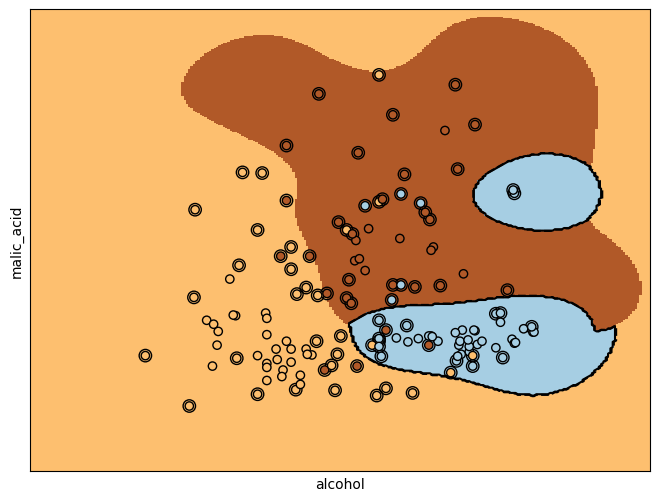

In [53]:
# plot the line, the points, and the nearest vectors to the plane
fignum = 1
plt.figure(fignum, figsize=(8, 6))
plt.clf()

plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10, edgecolors='k')
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, zorder=10, cmap=plt.cm.Paired,
            edgecolors='k')

plt.axis('tight')
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(fignum, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')
plt.contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])
plt.xlabel(wine.columns[0])
plt.ylabel(wine.columns[1])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())
fignum = fignum + 1

## 5. Neural Networks: Muli-layer perceptron

Multi-layer perceptron (MLP) is an artificial neural network. The model learns from the dataset through three types of layers:
* *The input layer*: The input layer receives the features to be processed.
* *The output layer*: The prediction and classification is performed by the output layer.
* *The hidden layers*: An arbitrary number of hidden layers that are placed in between the input and output layer perform the computation. Each layer has nodes (also known as neurons) that transforms the values from the previous layer into an activation funcition. The output layer receives the activated values from the last hidden layer and transforms them into output values.

<img src="https://static.javatpoint.com/tutorial/tensorflow/images/multi-layer-perceptron-in-tensorflow.png" alt="drawing" width="400"/>

Multi-layer perceptrons are networks of nodes that pass a linear combination of their inputs from one layer to another. As they do this, the nodes decide how to modify their inputs, utilizing a given activation function. The activation function of a neuron is the key here. By selecting non-linear activation functions, such as the logistic function \sigma(x) shown below, the neural network can embed non-linearity in its operation:

<img src="https://www.baeldung.com/wp-content/uploads/sites/4/2020/06/Copy-of-Copy-of-Blank-Diagram1.svg" alt="drawing" width="400"/>

Neural networks are good for non-linear classes of problems. The first advantage of neural networks is, therefore, their flexibility in addressing problems with non-linear shapes. MLPs are implemented in diverse fields such as speech recognition, image recognition, and machine translation software. From artificial neural networks, **deep learning** has emerged as a sub-field of machine learning.

Let's create a simple perceptron with 5 nodes in two layers

In [54]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=10000)
clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=10000,
              random_state=1, solver='lbfgs')

We will use the trained perpcetron to predict the wines' classes and compare with the real values. 

In [55]:
y_predicted = clf.predict(X_test)
results = pd.DataFrame({'y_real':y_test, 'y_predicted':y_predicted})
results["is_correct"] = [i['y_real'] == i['y_predicted'] for k,i in results.iterrows()]
results.head()

,y_real,y_predicted,is_correct
15,0,0,True
169,2,2,True
174,2,2,True
84,1,0,False
32,0,0,True


In [56]:
print("Correct predictions: " + str(len(results[results.is_correct == True])))
print("Wrong predictions: " + str(len(results[results.is_correct == False])))
print("Percentage of correct predictions: " + str(round(100*len(results[results.is_correct == True])/len(results),2)) + "%")

Correct predictions: 19
Wrong predictions: 17
Percentage of correct predictions: 52.78%


Let's see visually how the neural network performed

/Users/v.henry/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


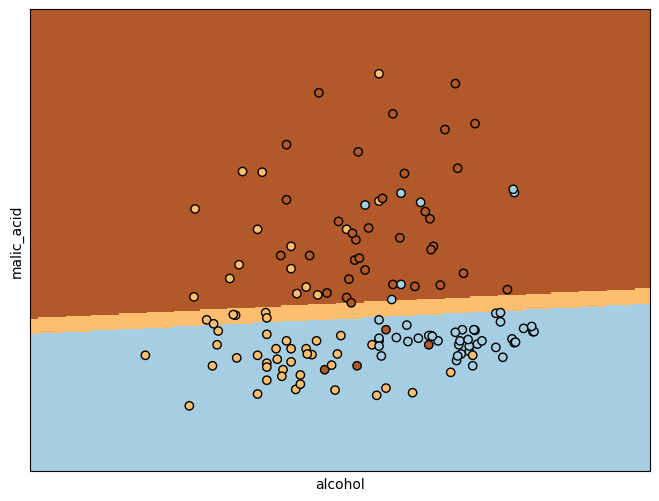

In [57]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, shading='auto', cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(wine.columns[0])
plt.ylabel(wine.columns[1])

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Exercise 5:
Now, it's your turn to create a neural network using all the features available from the wine dataset. Try with 20 nodes and 15 layers => (20,15). How well does this model perfom? Is it better or worse?

In [58]:
# Create your model here. Don't forget to run the fit function, and use the X_all_train and y_all_train dataframes.
#clf = ...

In [59]:
# Get the predicted value. Don't forget to use `X_all_test`
#y_all_predicted = ...

In [60]:
# Create the new result dataframe
#results = pd.DataFrame({'y_real': y_all_test, 'y_predicted': y_all_predicted})
#results["is_correct"] = [i['y_real'] == i['y_predicted'] for k,i in results.iterrows()]
#results

In [61]:
# Run the new results
#print("Correct predictions: " + str(len(results[results.is_correct == True])))
#print("Wrong predictions: " + str(len(results[results.is_correct == False])))
#print("Percentage of correct predictions: " + str(round(100*len(results[results.is_correct == True])/len(results),2)) + "%")